In [1]:
from data.generator import generate_batch, get_vocab_size
from model.lstm import LSTM
from train_lstm import step, valid_step
import torch

import seaborn as sns
import pandas as pd

In [13]:
MAX_ITER = 1000
BS = 64
LR = 1e-5
LEN = 1
NES = 1
HID_SIZE = 400
DEVICE = 'cuda'

In [14]:
model = LSTM(
    input_size=get_vocab_size(),
    hidden_size=HID_SIZE,
    output_size=get_vocab_size(),
    batch_size=BS).to(DEVICE)

In [15]:
loss = torch.nn.CrossEntropyLoss(reduction='none')
opt = torch.optim.Adam(model.parameters(), lr=LR)

In [16]:
padded_samples_batch, padded_targets_batch, samples_len, targets_len = generate_batch(length=LEN, nesting=NES, batch_size=BS)
padded_samples_batch, padded_targets_batch = padded_samples_batch.to(DEVICE), padded_targets_batch.to(DEVICE)

padded_samples_batch_v, padded_targets_batch_v, samples_len_v, targets_len_v = generate_batch(length=LEN, nesting=NES, batch_size=BS, split='valid')
padded_samples_batch_v, padded_targets_batch_v = padded_samples_batch_v.to(DEVICE), padded_targets_batch_v.to(DEVICE)

In [17]:
metrics = {
    'train_loss': [],
    'valid_loss': [],
    'train_acc': [],
    'valid_acc': [],
}

for i_step in range(MAX_ITER):
    loss_step, acc_step = step(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, loss, opt, DEVICE)
    metrics['train_loss'].append(loss_step)
    metrics['train_acc'].append(acc_step)
    
    if i_step % 100 == 0:
        for v_step in range(10):
            loss_valid_step, acc_valid_step = valid_step(model, padded_samples_batch_v, padded_targets_batch_v, samples_len_v, targets_len_v, loss, DEVICE)
        metrics['valid_loss'].append(loss_valid_step)
        metrics['valid_acc'].append(acc_valid_step)

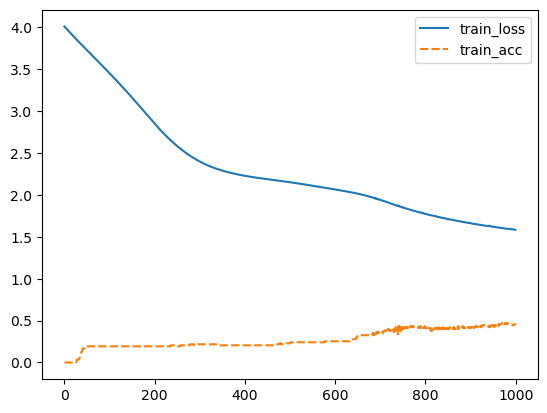

In [18]:
ax = sns.lineplot(pd.DataFrame({k: v for k, v in metrics.items() if 'train' in k}))